# Mercado Livre API - Overview da API a partir de uma query
Esse notebook apresenta diferentes métricas que se pode obter ao realizar uma query à API do Mercado Libre. 

(No momento, experimentando com diferentes visualizações. Ao finalizar uma versão, a descrição dos passos será completada de acordo).

## Imports e configurações gerais

In [48]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import requests
import pandas as pd

from pandas import Series, DataFrame

from IPython.core.display import Image, display

# Charts styling
#plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'



In [49]:
# style to enhance df viz, from https://github.com/brandon-rhodes/pycon-pandas-tutorial
from IPython.core.display import HTML
css = open('style-table.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Parâmetros de entrada

In [50]:
# Sets input parameters 
DAYS_AGO = 365 # days to look back in visits history
ITEMS_TO_PLOT = 10 # list of "ITEMS_TO_PLOT" top sold items; e.g. if 10, visits from top 10 sold itens will be plotted

## Busca de itens a partir de uma query definida pelo usuário

- Get dos resultados da busca
- Ordenamento dos itens por mais vendidos e remoção de itens duplicados
- Corte de itens pelo limite *ITEMS_TO_PLOT*

In [51]:
### REQUEST: gets items according to search for 'query' 

#query = "kit painel solar"
query = input('Qual a query desejada? ')

url = "https://api.mercadolibre.com/sites/MLB/search?q=" + query
print('Buscando por "' + query + '"...')
data = requests.get(url).json()

results = data["results"] # saves content from json in variable
df = DataFrame(results) # converts to a pandas df
#df.head()

Qual a query desejada? kit telefone rural
Buscando por "kit telefone rural"...


In [52]:
df.columns

Index(['accepts_mercadopago', 'address', 'attributes', 'available_quantity',
       'buying_mode', 'category_id', 'condition', 'currency_id',
       'differential_pricing', 'id', 'installments', 'listing_type_id',
       'official_store_id', 'original_price', 'permalink', 'price', 'seller',
       'seller_address', 'shipping', 'site_id', 'sold_quantity', 'stop_time',
       'subtitle', 'thumbnail', 'title'],
      dtype='object')

In [53]:
df = df[["id", "title", "price", "sold_quantity", "available_quantity", "permalink", "thumbnail"]] # gets only interesting columns

# sorts items by sold quantity and deletes duplicates with less sales (assuming they'd be 0)
df = df.sort_values(by="sold_quantity", ascending=False)
df = df.drop_duplicates(subset=['title'], keep='first')

ids = df.id.values[0:ITEMS_TO_PLOT] # gets top sold items ML ids in a list

df = df.set_index('id') # sets index to id

df.head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail
id,,,,,,
MLB679968241,Kit Completo Telefonia Rural Celular Dual Chip...,259.90,2410,8890,http://produto.mercadolivre.com.br/MLB-6799682...,http://mlb-s2-p.mlstatic.com/186911-MLB2066584...
MLB720779330,Kit Celular Rural Ca900 - Telefone Mesa +cabo+...,368.49,1319,99878,http://produto.mercadolivre.com.br/MLB-7207793...,http://mlb-s1-p.mlstatic.com/14735-MLB28858205...
MLB686082206,Kit Telefone Celular Rural Unico Que Funciona ...,349.90,372,9855,http://produto.mercadolivre.com.br/MLB-6860822...,http://mlb-s1-p.mlstatic.com/12885-MLB20067443...
MLB706514086,Kit Celular Rural 900 Mhz Telefone Mesa+ Cabo ...,369.90,322,943,http://produto.mercadolivre.com.br/MLB-7065140...,http://mlb-s2-p.mlstatic.com/345201-MLB2030447...
MLB701920742,Kit Telefone Mesa Celular Rural 2 Chip + Anten...,280.00,305,9285,http://produto.mercadolivre.com.br/MLB-7019207...,http://mlb-s2-p.mlstatic.com/988211-MLB2052243...


In [54]:
df.describe()

,price,sold_quantity,available_quantity
count,44.000000,44.000000,44.000000
mean,382.454545,150.840909,29644.409091
std,155.251071,406.198367,43713.684006
min,17.990000,0.000000,5.000000
25%,299.742500,12.500000,99.000000
50%,359.900000,35.500000,4994.500000
75%,398.250000,112.000000,99887.500000
max,899.990000,2410.000000,99996.000000


In [55]:
df.head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail
id,,,,,,
MLB679968241,Kit Completo Telefonia Rural Celular Dual Chip...,259.90,2410,8890,http://produto.mercadolivre.com.br/MLB-6799682...,http://mlb-s2-p.mlstatic.com/186911-MLB2066584...
MLB720779330,Kit Celular Rural Ca900 - Telefone Mesa +cabo+...,368.49,1319,99878,http://produto.mercadolivre.com.br/MLB-7207793...,http://mlb-s1-p.mlstatic.com/14735-MLB28858205...
MLB686082206,Kit Telefone Celular Rural Unico Que Funciona ...,349.90,372,9855,http://produto.mercadolivre.com.br/MLB-6860822...,http://mlb-s1-p.mlstatic.com/12885-MLB20067443...
MLB706514086,Kit Celular Rural 900 Mhz Telefone Mesa+ Cabo ...,369.90,322,943,http://produto.mercadolivre.com.br/MLB-7065140...,http://mlb-s2-p.mlstatic.com/345201-MLB2030447...
MLB701920742,Kit Telefone Mesa Celular Rural 2 Chip + Anten...,280.00,305,9285,http://produto.mercadolivre.com.br/MLB-7019207...,http://mlb-s2-p.mlstatic.com/988211-MLB2052243...


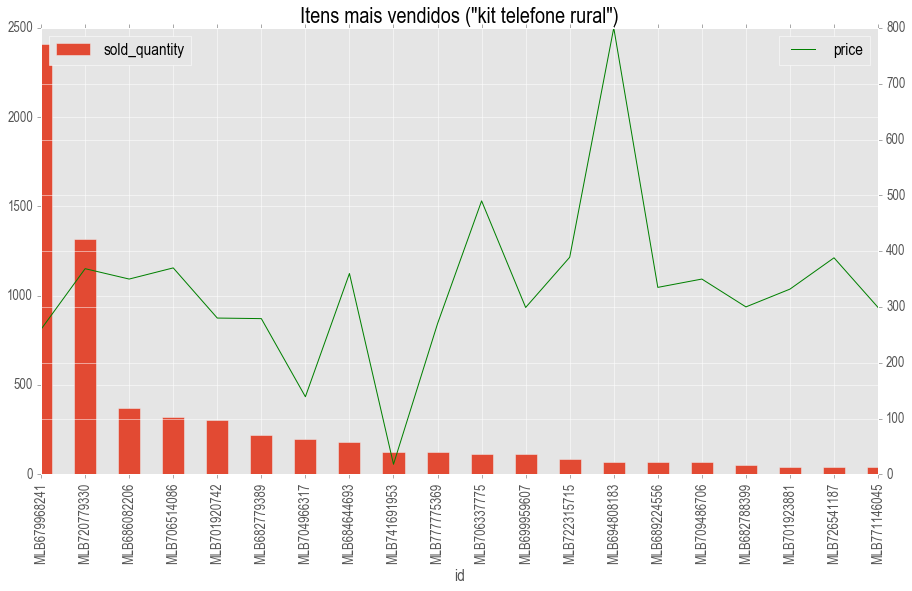

In [56]:
# sold quantity vs. unit price

# procedure to handle secondary Y axis
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

y0 = df.head(20).sold_quantity.plot(kind='bar', ax=ax0)#, label='Itens vendidos')
y1 = df.head(20).price.plot(secondary_y=True, style='g', ax=ax1)#, label='Preço unitário')
y0.legend(loc=2) # bar legend to the left
y1.legend(loc=0) # line legend to the right

plt.title('Itens mais vendidos ("' + query + '")', fontsize=22)
plt.show()
plt.close()

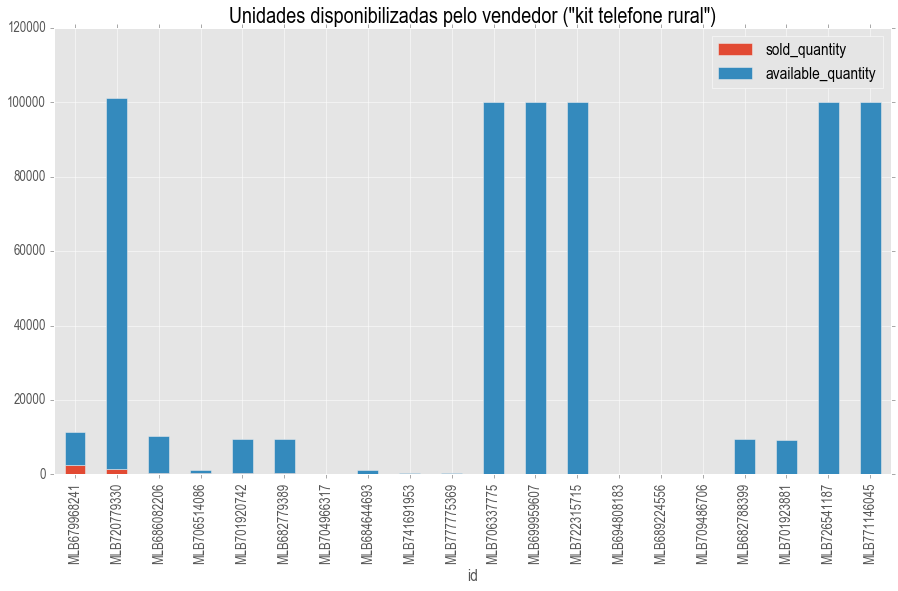

In [57]:
# total amount of each item (sold + stock)

df[['sold_quantity', 'available_quantity']].head(20).plot(kind='bar', stacked=True)
plt.title('Unidades disponibilizadas pelo vendedor ("' + query + '")', fontsize=22)

In [58]:
# stacked plot: sold + available


## Request por visitas dos itens filtrados e ordenados

- Get das visitas dos itens desde *DAYS_AGO* dias atrás 
- Organização dos resultados em um único **df** indexado por data
- Headers das colunas editados para serem as ids dos itens

In [59]:
#### REQUEST: get visits (by days) for the items in 'ids'

days = DAYS_AGO # number of days ago to consider
ids_string = ','.join(ids) # makes comma-separated string from list to use in URL

url = 'https://api.mercadolibre.com/items/visits/time_window?ids=' + ids_string +'&last=' + str(days) + '&unit=day'
data = requests.get(url).json()

visits_df = DataFrame(data[0]['results']) # initialize a df with the first item out of 10 (top ten in ids_string)
visits_df = visits_df[['date', 'total']] # gets only main columns
visits_df.columns = ['date', data[0]['item_id']] # renames 'total' to item's ID

column_headers = [] # list to store item ids used as column headers
column_headers.append(data[0]['item_id'])

# iterates over data items to merge all 'total' columns into same df
for item in data[1:]:
    results = item['results']
    df_temp = DataFrame(results)
    df_temp = df_temp[['date', 'total']]
    df_temp.columns = ['date', item['item_id']]
    column_headers.append(item['item_id'])
    visits_df = pd.merge(visits_df, df_temp, on='date')
    
#print(column_headers)
#visits_df.head()

In [60]:
# fixes df, parsing 'date' properly and setting as index column
visits_df['date'] = pd.to_datetime(visits_df['date'])
visits_df = visits_df.set_index('date')

visits_df.head()

,MLB679968241,MLB720779330,MLB686082206,MLB706514086,MLB701920742,MLB682779389,MLB704966317,MLB684644693,MLB741691953,MLB777775369
date,,,,,,,,,,
2015-10-17 04:00:00,22,34,47,24,29,3,8,29,0,0
2015-10-18 04:00:00,95,31,47,7,33,5,6,43,0,0
2015-10-19 04:00:00,17,39,56,17,31,8,10,44,0,0
2015-10-20 04:00:00,125,23,32,20,32,21,9,49,0,0
2015-10-21 04:00:00,93,42,42,17,43,5,4,36,0,0


## Visualização dos dados de 3 formas
- Visitas por dia (básico)
- Média móvel de visitas (janela da média definida no código, ainda hardcoded)
- Soma acumulada de visitas

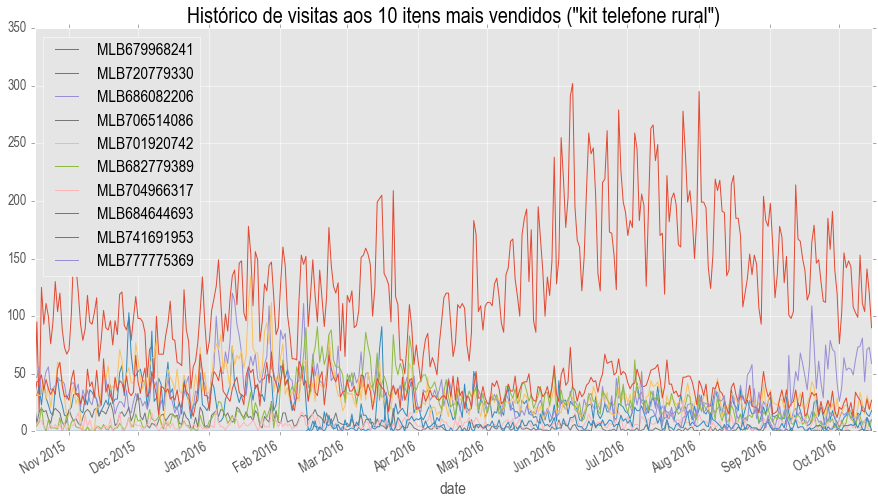

In [61]:
plt.figure()
visits_df.plot(legend=True);
plt.title('Histórico de visitas aos 10 itens mais vendidos ("' + query + '")', fontsize=22)

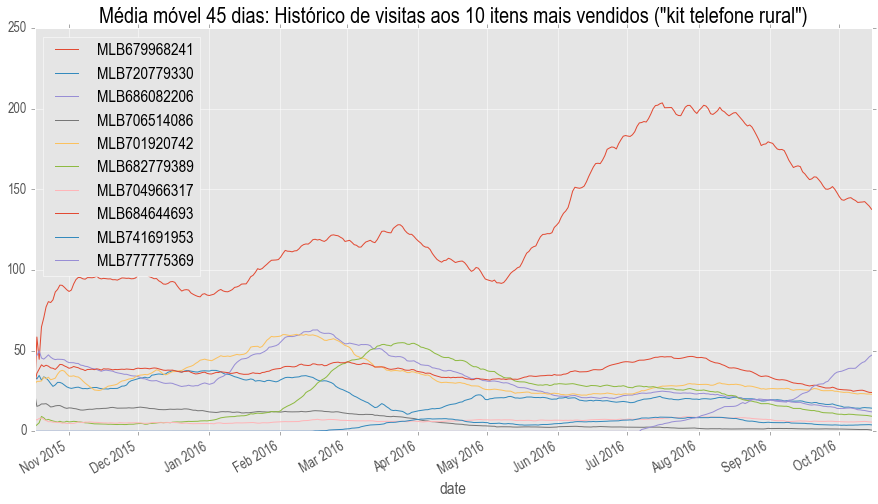

In [62]:
# calculates and plots visits' rolling mean (smoother curves)
#rolling_mean_df = visits_df.resample("1d").sum().fillna(0).rolling(window=30, min_periods=1).mean() #when resampling is needed

plt.figure();
days_rolling = 45;
rolling_mean_df = visits_df.rolling(window=days_rolling, min_periods=1).mean() # window is the # of days evaluated in rolling mean
rolling_mean_df.plot();
plt.title('Média móvel ' + str(days_rolling) + ' dias: Histórico de visitas aos 10 itens mais vendidos ("' + query + '")', fontsize=22)

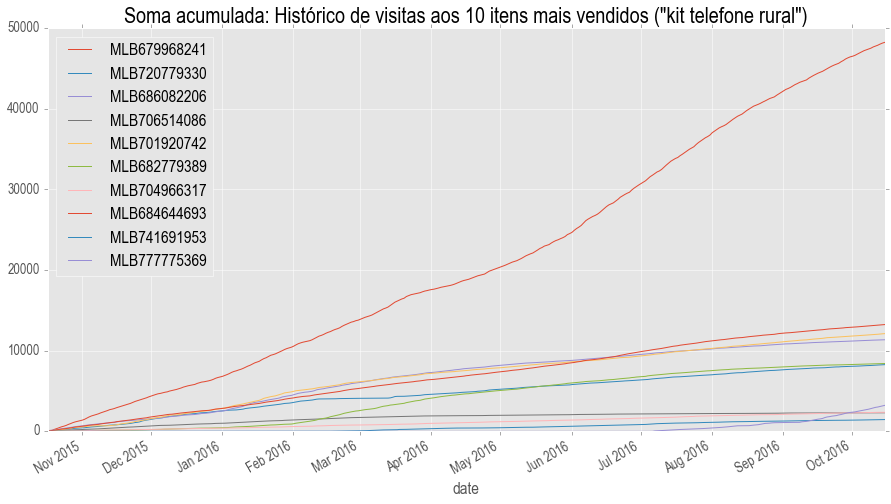

In [63]:
cumulative_visits_df = visits_df.cumsum() # calculates accumulated values to plot
plt.figure();
cumulative_visits_df.plot(legend=True);
plt.title('Soma acumulada: Histórico de visitas aos 10 itens mais vendidos ("' + query + '")', fontsize=22)

## Lista dos itens plotados e URLs

10 itens mais vendidos: 



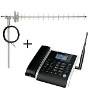

MLB679968241 - Kit Completo Telefonia Rural Celular Dual Chip + Antena
http://produto.mercadolivre.com.br/MLB-679968241-kit-completo-telefonia-rural-celular-dual-chip-antena-_JM


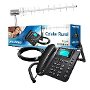

MLB720779330 - Kit Celular Rural Ca900 - Telefone Mesa +cabo+ Antena 17dbi
http://produto.mercadolivre.com.br/MLB-720779330-kit-celular-rural-ca900-telefone-mesa-cabo-antena-17dbi-_JM


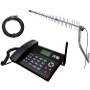

MLB686082206 - Kit Telefone Celular Rural Unico Que Funciona Em Todo Brasil
http://produto.mercadolivre.com.br/MLB-686082206-kit-telefone-celular-rural-unico-que-funciona-em-todo-brasil-_JM


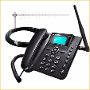

MLB706514086 - Kit Celular Rural 900 Mhz Telefone Mesa+ Cabo + Antena 17dbi
http://produto.mercadolivre.com.br/MLB-706514086-kit-celular-rural-900-mhz-telefone-mesa-cabo-antena-17dbi-_JM


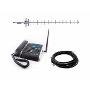

MLB701920742 - Kit Telefone Mesa Celular Rural 2 Chip + Antena Externa 15
http://produto.mercadolivre.com.br/MLB-701920742-kit-telefone-mesa-celular-rural-2-chip-antena-externa-15-_JM


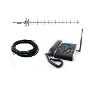

MLB682779389 - Kit Completo Telefonia Rural Celular Dual Chip + Antena Quad
http://produto.mercadolivre.com.br/MLB-682779389-kit-completo-telefonia-rural-celular-dual-chip-antena-quad-_JM


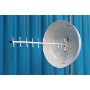

MLB704966317 - Kit Antena Cubica P/ Telefone E Internet Rural 1800/2100mhz
http://produto.mercadolivre.com.br/MLB-704966317-kit-antena-cubica-p-telefone-e-internet-rural-18002100mhz-_JM


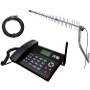

MLB684644693 - Kit Telefone Celular Rural 2 Chip +internet Cabo 15 M Antena
http://produto.mercadolivre.com.br/MLB-684644693-kit-telefone-celular-rural-2-chip-internet-cabo-15-m-antena-_JM


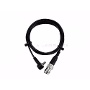

MLB741691953 - Kit Cabo Adaptado Celular Antena Rural Para Celular Lg B220
http://produto.mercadolivre.com.br/MLB-741691953-kit-cabo-adaptado-celular-antena-rural-para-celular-lg-b220-_JM


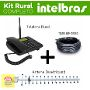

MLB777775369 - Kit Telefone Celular Rural Fixo Completo Intelbras + Antena
http://produto.mercadolivre.com.br/MLB-777775369-kit-telefone-celular-rural-fixo-completo-intelbras-antena-_JM


In [65]:
# prints URLs from items in chart

print(str(ITEMS_TO_PLOT) + ' itens mais vendidos:', '\n')
for item in column_headers:
    display(Image(df.loc[item, 'thumbnail']))
    print(item + ' - ' + df.loc[item, 'title']) # uses loc taking advantage of indexing by id made previously
    print(df.loc[item, 'permalink'])
    

## Todo:
- Plot itens by seller location
- Fix documentation at the end